# Regression (Ridge & ElasticNet)

Project Goals:
- Building a Regression Model with both Ridge & ElasticNet
- Applying Feature Scaling 
- Hyperparameter tuning with GridSearch
- Evaluating model performance with test dataset.

### Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load Dataset 

In [3]:
sales_df = pd.read_csv("ad_sales.csv")

In [4]:
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


## Dataset Info and Descriptives

In [5]:
#General info about dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   influencer    4546 non-null   object 
 4   sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.7+ KB


In [6]:
# Checking null values
sales_df.isnull().sum()

tv              0
radio           0
social_media    0
influencer      0
sales           0
dtype: int64

In [7]:
# Changing Object data type to Category data type
sales_df["influencer"] = sales_df["influencer"].astype("category")

In [8]:
# Checking dtypes
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   tv            4546 non-null   float64 
 1   radio         4546 non-null   float64 
 2   social_media  4546 non-null   float64 
 3   influencer    4546 non-null   category
 4   sales         4546 non-null   float64 
dtypes: category(1), float64(4)
memory usage: 146.8 KB


In [9]:
sales_df["influencer"].unique() 

['Mega', 'Micro', 'Nano', 'Macro']
Categories (4, object): ['Macro', 'Mega', 'Micro', 'Nano']

In [10]:
sales_df["influencer"].value_counts()

Mega     1152
Micro    1148
Nano     1134
Macro    1112
Name: influencer, dtype: int64

In [11]:
sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tv,4546.0,54062.912451,26104.941838,10000.00,32000.0000,53000.000,77000.0000,100000.00
radio,4546.0,18157.533110,9663.259642,0.68,10555.3550,17859.515,25640.6050,48871.16
social_media,4546.0,3323.472829,2211.253915,0.03,1530.8225,3055.565,4804.9225,13981.66
sales,4546.0,192413.332112,93019.873216,31199.41,112434.6100,188963.680,272324.2400,364079.75


### Ordinal Encoding for Categorical Variables

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
cat = ["Nano", "Micro", "Macro", "Mega"]

In [14]:
enc = OrdinalEncoder(categories= [cat])
enc

OrdinalEncoder(categories=[['Nano', 'Micro', 'Macro', 'Mega']])

In [15]:
sales_df[["influencer"]] = enc.fit_transform(sales_df[["influencer"]])

In [48]:
sales_df[["influencer"]].sample(5)

,influencer
1874,1.0
4347,2.0
971,2.0
4400,1.0
3249,0.0


## Correlation and Graphs

In [17]:
# Correlations
sales_df.corr()

,tv,radio,social_media,influencer,sales
tv,1.000000,0.869158,0.527687,0.000154,0.999497
radio,0.869158,1.000000,0.606338,0.003134,0.868638
social_media,0.527687,0.606338,1.000000,0.019942,0.527446
influencer,0.000154,0.003134,0.019942,1.000000,0.000532
sales,0.999497,0.868638,0.527446,0.000532,1.000000


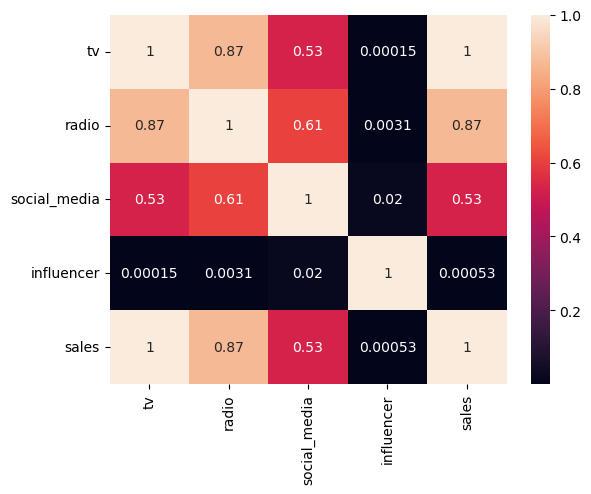

In [18]:
sns.heatmap(sales_df.corr(), annot = True)
plt.show()

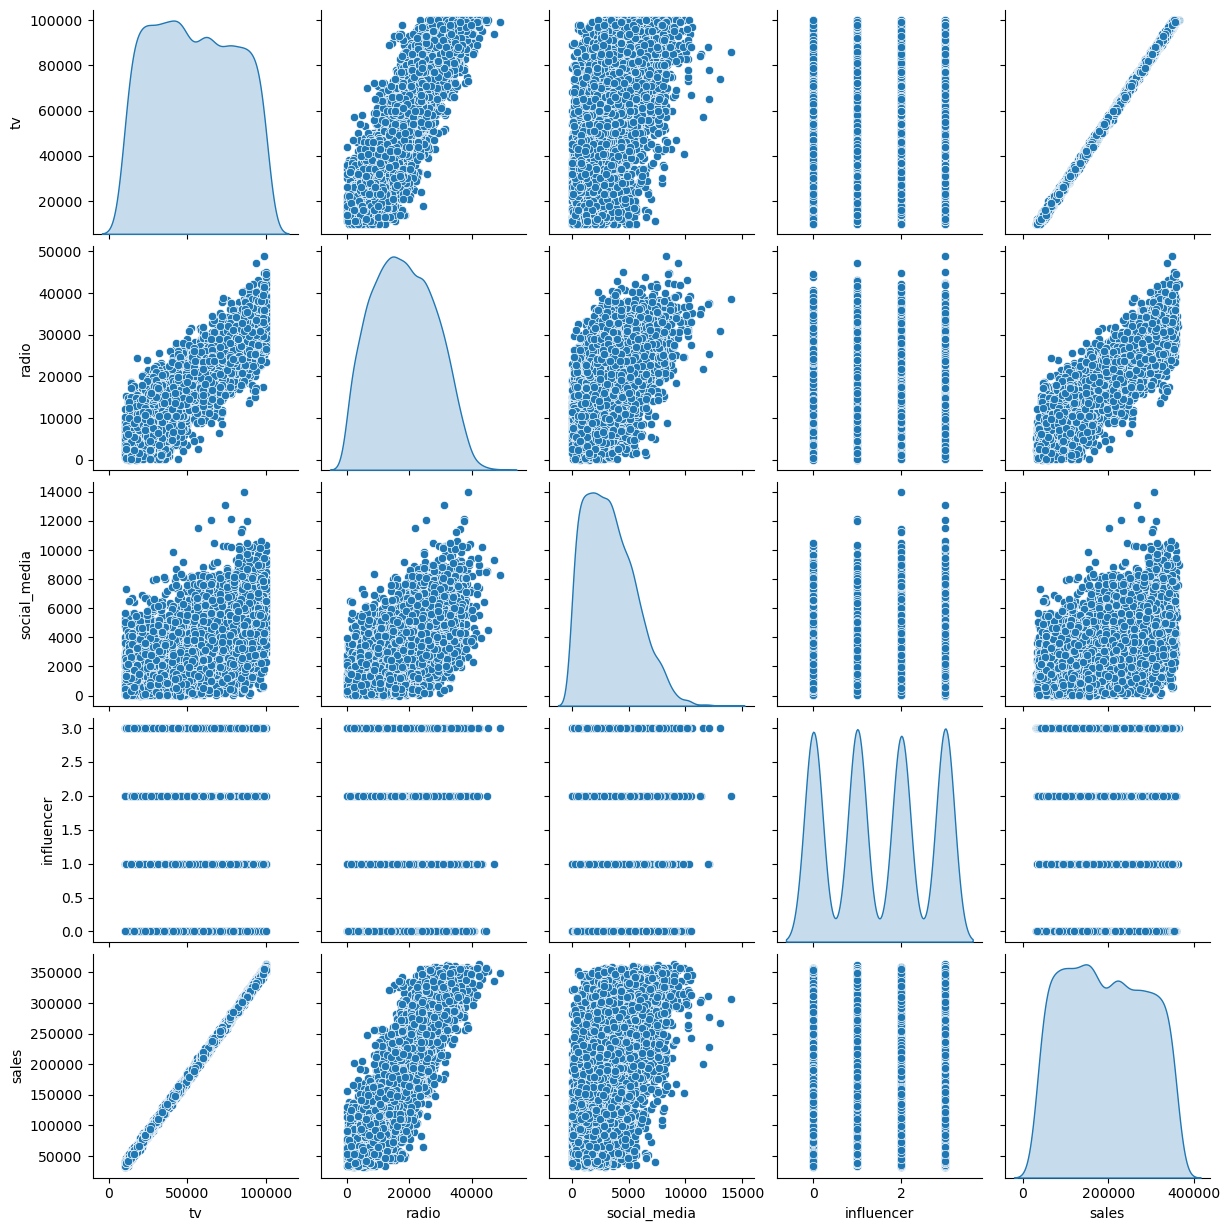

In [19]:
sns.pairplot(sales_df,diag_kind='kde')
plt.show()

#### One simply observes that Sales are higly correlated with TV commercials.

## Select features and response variables

In [20]:
X = sales_df.drop("sales", axis = 1)
y = sales_df["sales"]

## Split the data in train set and test set

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(sales_df, y, test_size=0.2, random_state=101)

In [23]:
X_train.shape , X_test.shape

((3636, 5), (910, 5))

## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Applying Ridge Model

In [27]:
from sklearn.linear_model import Ridge

In [28]:
model_Ridge = Ridge()

In [29]:
model_Ridge.fit(scaled_X_train, y_train)

Ridge()

### Model performance evaluation with test dataset

In [30]:
y_pred = model_Ridge.predict(scaled_X_test)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [33]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9999710448027217
MAE 		: 403.99477250724846
MSE 		: 252865.47872926717
RMSE 		: 502.8573144832112


### Applying ElacticNet

In [34]:
from sklearn.linear_model import ElasticNet

In [35]:
model_EN = ElasticNet()

In [36]:
model_EN.fit(scaled_X_train, y_train)

ElasticNet()

### Model performance evaluation with test dataset

In [37]:
y_pred = model_EN.predict(scaled_X_test)

In [38]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9594076114231105
MAE 		: 15365.843286836061
MSE 		: 354492966.20588183
RMSE 		: 18827.983593733075


### Hyperparameter tuning with GridSearch

**alpha :** Constant that multiplies the penalty terms. Defaults to 1.0.  
[0.0001, 0.001, 0.01, 0.1, 0, 0.1, 0.5, 1.0, 5, 10.0]

**l1_ratio :** The ElasticNet mixing parameter, with ``0 <= l1_ratio <= 1``  
[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]

**scoring** = 'neg_mean_squared_error'

**cv** = 5

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
parameters = { "alpha" : [0.0001, 0.001, 0.01, 0.1, 0, 0.1, 0.5, 1.0, 5, 10.0],
             "l1_ratio" : [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]
             }

In [41]:
model_EN = ElasticNet()

In [42]:
grid = GridSearchCV(estimator = model_EN, 
                    param_grid = parameters,
                    scoring = 'neg_mean_squared_error',
                    cv = 5)

In [43]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0, 0.1, 0.5, 1.0,
                                   5, 10.0],
                         'l1_ratio': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                      0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

### Best parameters according to GridSearchCV

In [44]:
grid.best_params_

{'alpha': 0.001, 'l1_ratio': 0.6}

### Model performance evaluation with test dataset

In [45]:
y_pred = grid.predict(scaled_X_test)

In [46]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9998867621415959
MAE 		: 798.7628177213061
MSE 		: 988905.2041480512
RMSE 		: 994.4371293088625


#### When looking at ElasticNet and Ridge models performance, we can say Ridge model is better choice for this dataset